# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organising Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](kohonen.png)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i-th$ node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i-th$ node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

### Example 10x10 network after 100 iterations

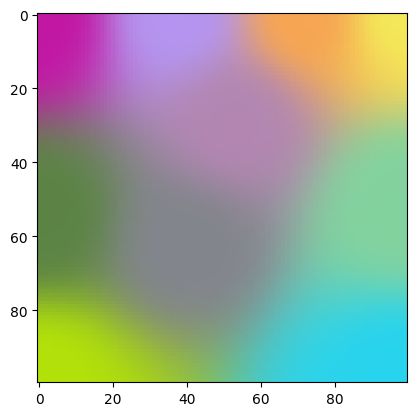

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

### Example 100x100 network after 1000 iterations

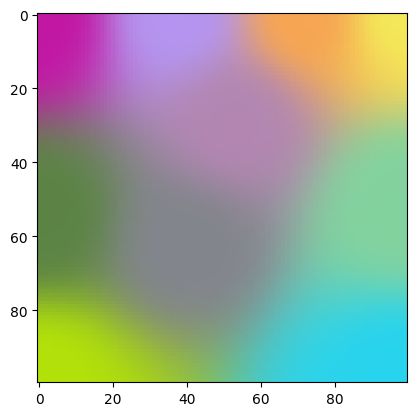

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

## Challenge

Sam has written an implementation of a Self Organising Map. Consider the following criteria when assessing Sam's code:

- Could the code be made more efficient? A literal interpretation of the instructions above is not necessary.
- Is the code best structured for later use by other developers and in anticipation of productionisation?
- How would you approach productionising this application?
- Anything else you think is relevant.

In [ ]:
# kohonen.py
import matplotlib.pyplot as plt
import numpy as np

def train(input_data, n_max_iterations, width, height):
    σ0 = max(width, height) / 2
    α0 = 0.1
    weights = np.random.random((width, height, 3))
    λ = n_max_iterations / np.log(σ0)
    for t in range(n_max_iterations):
        σt = σ0 * np.exp(-t/λ)
        αt = α0 * np.exp(-t/λ)
        for vt in input_data:
            bmu = np.argmin(np.sum((weights - vt) ** 2, axis=2))
            bmu_x, bmu_y = np.unravel_index(bmu, (width, height))
            for x in range(width):
                for y in range(height):
                    di = np.sqrt(((x - bmu_x) ** 2) + ((y - bmu_y) ** 2))
                    θt = np.exp(-(di ** 2) / (2*(σt ** 2)))
                    weights[x, y] += αt * θt * (vt - weights[x, y])
    return weights

if __name__ == '__main__':
    # Generate data
    input_data = np.random.random((10,3))
    image_data = train(input_data, 100, 10, 10)

    plt.imsave('100.png', image_data)

    # Generate data
    input_data = np.random.random((10,3))
    image_data = train(input_data, 1000, 100, 100)

    plt.imsave('1000.png', image_data)


# My Version
We will execute the code, but with minor adjustments:
- separate the imported libraries in a different cell (when kernel is initialised, importing takes extra time).
- every line is commented, to understand what being executed.
- added a calculation of the elapsed time to train a map.
- changed greek lettes to ASCII characters to make it easier to read.

In [ ]:
# Importing libraries in a separate cell for better organization and readability.
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:

def train(input_data, n_max_iterations, width, height): # TODO: there are no docstrings or type hints, we should add those for better readability and maintainability.
    # Initial neighborhood radius.
    sigma_0 = max(width, height) / 2  

    # Initial learning rate.
    alpha_0 = 0.1 # TODO: This is hardcoded, so we can't adjust this value for experimenting.

    # Randomly initialize weights for each neuron in the grid.
    weights = np.random.random((width, height, 3))   # TODO: what if input_data.shape[2] is not 3? This number is hardcoded, and needs to be dynamic based on the input data's shape.

    # Time constant for decay of learning rate and neighborhood radius.
    lambd = n_max_iterations / np.log(sigma_0)  

    # ADDED BY ME: start a timer to measure the time taken every N iterations.
    start_time = time.perf_counter()    

    # Training loop.
    for t in range(n_max_iterations):

        # ADDED BY ME: print elapsed time every 10 iterations, and then restart the clock.
        iterations = 10
        if t % iterations == 0 and t != 0:
            end_time = time.perf_counter()
            print(f"Iteration {t}/{n_max_iterations} - Time taken: {end_time - start_time:.4f} seconds.")
            start_time = time.perf_counter() 

        # Update σ and α.
        sigma_t = sigma_0 * np.exp(-t/lambd)
        alpha_t = alpha_0 * np.exp(-t/lambd)

        # Find the Best Matching Unit (BMU) and update weights.
        for vt in input_data:  # TODO: We can use mini batches or shuffle and sample, instead of iterating through each input vector, to help with performance and convergence.

            # Find the BMU.
            bmu = np.argmin(np.sum((weights - vt) ** 2, axis=2))

            # define the BMU's coordinates.
            bmu_x, bmu_y = np.unravel_index(bmu, (width, height))

            # For each node in the grid, calculate the neighborhood function and update the weights.
            for x in range(width): # TODO: Nested loop is too expensive, we can vectorize this operation and improve performance.
                for y in range(height): # TODO: This calculation does not use the input vector, so could be removed from the loop.

                    # Calculate the euclidean distance from the BMU.
                    di = np.sqrt(((x - bmu_x) ** 2) + ((y - bmu_y) ** 2)) # TODO: no need to calculate the square root, we can just use the squared distance.

                    # Calculate the neighborhood function (theta).
                    theta_t = np.exp(-(di ** 2) / (2*(sigma_t ** 2))) # TODO: distance should be squared, so we can avoid calculating the square root.

                    # Update the weights of the node.
                    weights[x, y] += alpha_t * theta_t * (vt - weights[x, y])

    return weights

Iteration 10/100 - Time taken: 0.0755 seconds.
Iteration 20/100 - Time taken: 0.0258 seconds.
Iteration 30/100 - Time taken: 0.0220 seconds.
Iteration 40/100 - Time taken: 0.0218 seconds.
Iteration 50/100 - Time taken: 0.0219 seconds.
Iteration 60/100 - Time taken: 0.0221 seconds.
Iteration 70/100 - Time taken: 0.0221 seconds.
Iteration 80/100 - Time taken: 0.0221 seconds.
Iteration 90/100 - Time taken: 0.0232 seconds.


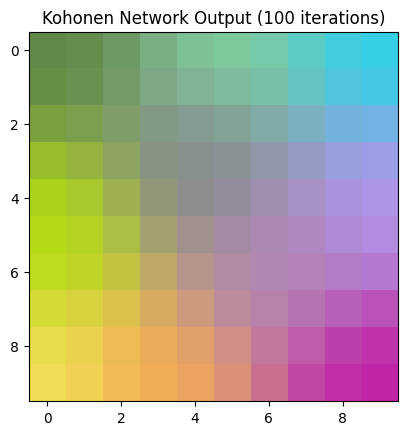

In [ ]:
# generate the image data with 100 iterations and a 10x10 grid.
image_data = train(input_data, 100, 10, 10)

# display the image data 
plt.imshow(image_data)
plt.title("Kohonen Network Output (100 iterations)")
    
# save the image data.
plt.imsave('100.png', image_data)

Iteration 10/1000 - Time taken: 2.2138 seconds.
Iteration 20/1000 - Time taken: 2.4454 seconds.
Iteration 30/1000 - Time taken: 2.1408 seconds.
Iteration 40/1000 - Time taken: 2.1294 seconds.
Iteration 50/1000 - Time taken: 2.1447 seconds.
Iteration 60/1000 - Time taken: 2.1126 seconds.
Iteration 70/1000 - Time taken: 2.1315 seconds.
Iteration 80/1000 - Time taken: 2.1774 seconds.
Iteration 90/1000 - Time taken: 2.2482 seconds.
Iteration 100/1000 - Time taken: 2.1981 seconds.
Iteration 110/1000 - Time taken: 2.1213 seconds.
Iteration 120/1000 - Time taken: 2.1874 seconds.
Iteration 130/1000 - Time taken: 2.2344 seconds.
Iteration 140/1000 - Time taken: 2.1258 seconds.
Iteration 150/1000 - Time taken: 2.1356 seconds.
Iteration 160/1000 - Time taken: 2.2050 seconds.
Iteration 170/1000 - Time taken: 2.1855 seconds.
Iteration 180/1000 - Time taken: 2.2213 seconds.
Iteration 190/1000 - Time taken: 2.1536 seconds.
Iteration 200/1000 - Time taken: 2.1361 seconds.
Iteration 210/1000 - Time tak

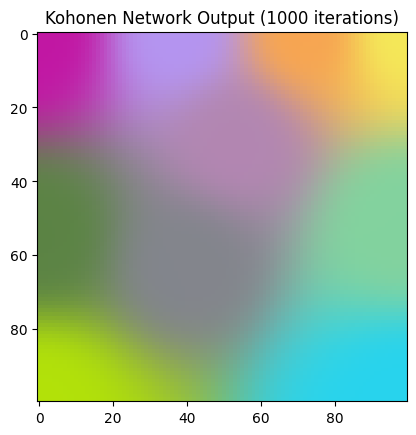

In [19]:
# generate the image data with 1000 iterations and a 100x100 grid.
image_data = train(input_data, 1000, 100, 100)

# display the image data.
plt.imshow(image_data)
plt.title("Kohonen Network Output (1000 iterations)")

# save the image data.
plt.imsave('1000.png', image_data)

# My analysis.
I'll break down the analysis into two sections: 
1. Correctness & Conceptual Errors
2. Efficiency & Performance Improvements
3. Code Structure and maintanability
4. Strategy for production

___

## 1. Correctness & Conceptual Errors.
### 1.1 Weight dimensionality is hard-coded and incorrect
When defining the weights, `weights = np.random.random((width, height, 3))` it assumes input vectors are **always length 3**, but if the input_data has shape `(m, n, d)` with `d != 3`, the code will either:

- silently broadcast incorrectly, or
- crash with a shape error.

**Correct behaviour:**
The weight dimension must be inferred from the input:
```
# get the number of features from the dataset.
n_features = input_data.shape[1]

# use that number as the third dimension of the grid.
weights = np.random.random((width, height, n_features))
```
Even though this is not an error now with the given sample dataset, **it could be an error as soon as we try with other dimension sizes**.

---

### 1.2. BMU distance computation could be misleading.

This is not an error in the code. It is only a modification that makes the process more explicit.

```
bmu = np.argmin(np.sum((weights - vt) ** 2, axis=2))
```
This works numerically, but:

- The code is implicitly flattening `(width, height)` via `argmin`.
- But at the same time, `axis=2` returns the right arg min for each sample.
- This _could_ make the logic harder to reason.

Better practice is to:

- first compute distances explicitly between sample and nodes.
- then, get the BMUs by keeping the 2D grid structure intact

```
# calculate the distances
distances = np.sum((weights - vt) ** 2, axis=2) 

# choose the BMU from all the distances.
bmu_x, bmu_y = np.unravel_index(np.argmin(distances), distances.shape) 
```

---

### 1.3. Input data assumptions are undocumented

The function assumes:

- input_data is a NumPy array
- data is already normalised
- no missing values
- correct dtype

None of this is validated or documented, which makes it **risky for reuse** on production as it is.

---

### 1.4. Greek letters make it difficult to debug.
Even though nowadays most IDE accept Unicode identifiers, _in practice_, Greek symbols reduce readability (“is that σ or ς?”), make debugging harder, and can cause issues with tooling, linters, diff tools, fonts, and collaboration across teams. ASCII identifiers are clearer, more accessible, and more maintainable.

---

### 1.5. Where is the U-Matrix?
The output of `train()` is the learned grid of weights, and the images are the weights mapped to the `(R, G, B)` space. If we want to use this function to then evaluate _"distance"_ between data points mapped to the grid, we need to then use the U-matrix.

---

## 2. Efficiency & Performance Improvements.
Once correctness is addressed, performance becomes the main concern.

### 2.1 Triple nested loops → Poor scaling.

The original implementation contains four nested loops:
```
for t in range(n_iterations):
    for vt in input_data:
        for x in range(width):
            for y in range(height):
```

This means the Big O time complexity is:
```
O(n_iterations × n_samples × width × height) -> O(n⁴)
```

For larger grids, this becomes computationally expensive.
For example, a 100×100 grid with 1000 iterations took 3 minutes to train.

The main bottleneck is the double loop over `(width × height)` inside every sample update.

---
### 2.2 Vectorising the Neighbourhood Update

Instead of looping over every neuron individually:
```
for x in range(width):
    for y in range(height):
        ...
```

We can:
1. Precompute the grid coordinates once.
2. Compute a full distance map from the BMU.
3. Update all weights in a single vectorised operation.

Example:
```
# Precompute grid coordinates once
X, Y = np.meshgrid(np.arange(width), np.arange(height), indexing="ij")

# For each BMU
dist_sq = (X - bmu_x)**2 + (Y - bmu_y)**2
theta = np.exp(-dist_sq / (2 * sigma_t**2))

# Vectorised update
weights += alpha_t * theta[..., None] * (vt - weights)
```

Key idea:

- theta has shape (width, height)
- theta[..., None] expands it to (width, height, 1)
- Broadcasting allows the update to be applied to all feature dimensions simultaneously

This keeps the same mathematics but moves computation from Python loops into NumPy’s optimised C backend.

---
### 2.3 Avoid Recomputing Static Grid Geometry

In the original inner loop:
```
di = np.sqrt((x - bmu_x)**2 + (y - bmu_y)**2)
```


These distances:
- depend only on grid coordinates.
- do not depend on the input vector (`vt`).
- grid structure never changes during training.

Yet the distances are recomputed:
- for every neuron `(x, y)`
- for every input vector `vt`
- for every training iteration `t`

Conceptually, the neighbourhood update works as:
- Find BMU
- Compute distance map from BMU to all grid nodes
- Apply Gaussian neighbourhood function
- Update weights

The distance map should be computed once per BMU, not inside nested loops.

---
### 2.4. Rethinking the training Loop.
The current implementation processes all samples at every iteration:
```
for vt in input_data:
```

In practice, common alternatives include:
- Shuffling samples each iteration
- Using mini-batches
- Sampling one random data point per iteration (classical online SOM)

These approaches:
- Reduce runtime
- Improve stochastic behaviour
- Often improve convergence stability

---
### 2.5. Remove unnecessary square roots.
Originally:
```
di = np.sqrt(...)
theta_t = np.exp(-(di ** 2) / ...)
```

Since `di` is squared immediately after computing the square root, the square root operation is unnecessary.

Using squared distances directly avoids extra computation while preserving correctness:
```
dist_sq = ...
theta = np.exp(-dist_sq / (2 * sigma_t**2))
```
Even though this is how the math behind the algorithm is written, it is not efficient in runtime.

---

# 3. Code structure & Maintainability.
### 3.1. Everything is in one function.

The current `train()` function:
- initialises
- trains
- controls hyperparameters
- don't log anything (train runtime, hyperparameters used, dataset id, etc)
- no seed for random weights initialisation

This makes:

- testing hard
- reuse painful
- extension risky
- experiment repetition not possible
- exeriment tracking not available

#### **Better structure:**

- SOM class
- clear separation of responsibilities

Example:
```
class SOM:
    def __init__(self, width, height, n_features, alpha, sigma):
        ...

    def _find_bmu(self, x):
        ...

    def _update_weights(self, x, bmu):
        ...

    def fit(self, X, n_iterations):
        ...
```

---

### 3.2. No docstring or type hints.
Production code should have something like this, to give users an idea of how to input variables (and types).
```
def train(
    input_data: np.ndarray,
    n_max_iterations: int,
    width: int,
    height: int
) -> np.ndarray:
```

---

### 3.3 Hard-coded hyperparameters.

The line `alpha_0 = 0.1` should be:
- passed as an argument.
- configurable
- logged when training as an hyerparameter.

---

### 3.4 Logging
Adding `import logging` to the list of libraries allows to structure logs and cloud integration.

---

# 4. Strategy for Production

### 4.1 Define the use case

Would be great to know if *is this SOM for visualisation, clustering, or online learning?*

This determines:

- training frequency
- dataset size
- latency requirements

---

### 4.2 Make training reproducible. 

- Set random seeds
- Version hyperparameters
- Save model state (weights, grid shape)

---

### 4.3 Add monitoring & validation. 

SOMs are unsupervised, but you can still track:

- quantisation error
- topographic error
- convergence metrics

Without these, we don’t know if training is “working”.

---

### 4.4 Package and deploy. 

For production:
- wrap in a Python package
- expose training/inference via a service if needed
- optionally accelerate with PyTorch or Tensorflow (graph mode)

---

### 4.5 Scalability considerations. 

If SOM size or data grows:
- CPU vectorisation may not be enough
- GPU acceleration becomes attractive
- or switch to MiniSom / PyTorch-based implementations

---

### 4.6. Other Relevant Observations

- No unit tests
- No input validation
- No separation between research code and production code
- No benchmarking against known SOM implementations

# My proposed code
- This version is “production-ready” in the following ways: correct dims, reproducible, validated inputs, logging, save/load, and a real U-Matrix.
- I didn't do the proper packaging (like creating the `pyproject.toml` to then be able to install this library as `pip install -e`)
- I kept the training loop over samples as a Python loop for clarity, but the heavy part (neighbour update) is fully vectorised (that’s the big speed win).

In [23]:
# kohonen.py  # Define the module filename so it’s easy to reference/import elsewhere.
from __future__ import annotations  # Enable forward type references for type hints.

import dataclasses                  # Provide a light-weight config container.
import logging                      # Use structured logging instead of print for production readiness.
import pathlib                      # Handle filesystem paths portably.
import time                         # Provide high-resolution timing.
from typing import Optional, Tuple  # Add precise type hints.

import numpy as np                  # Use NumPy for fast vectorised math.
import matplotlib.pyplot as plt     # Use matplotlib for optional image outputs.


LOGGER = logging.getLogger(__name__)  # Create a module-level logger for consistent logging.


@dataclasses.dataclass(frozen=True)  # Make config immutable to avoid accidental runtime mutation.
class SOMConfig:                     # Group hyperparameters and settings into one clearly versionable object.
    """
    Configuration container for the SelfOrganisingMap.

    This dataclass groups all hyperparameters and training settings required
    to initialise and train a Self-Organising Map (SOM).

    Attributes
    ----------
    width : int
        Number of columns in the SOM grid.
    height : int
        Number of rows in the SOM grid.
    n_iterations : int
        Number of training iterations.
    alpha_0 : float, default=0.1
        Initial learning rate.
    sigma_0 : float or None, default=None
        Initial neighbourhood radius. If None, defaults to max(width, height) / 2.
    seed : int or None, default=None
        Random seed for reproducibility.
    shuffle : bool, default=True
        Whether to shuffle input samples at each iteration.
    n_jobs : int, default=1
        Reserved for future parallel implementations.
    log_every : int, default=10
        Frequency (in iterations) for logging training progress.
    dtype : np.dtype, default=np.float32
        Numerical precision used for weights and computations.
    """
    width: int                       # Number of columns in the SOM grid.
    height: int                      # Number of rows in the SOM grid.
    n_iterations: int                # Number of training steps (iterations).
    alpha_0: float = 0.1             # Initial learning rate.
    sigma_0: Optional[float] = None  # Initial neighbourhood radius (None => default based on grid size).
    seed: Optional[int] = None       # RNG seed for reproducibility.
    shuffle: bool = True             # Whether to shuffle samples per epoch-like pass.
    n_jobs: int = 1                  # Placeholder for future parallelism; kept for API stability.
    log_every: int = 10              # Logging frequency (iterations).
    dtype: np.dtype = np.float32     # Use float32 by default for speed/memory.


class SelfOrganisingMap: 
    """
    Self-Organising Map (SOM) implementation with vectorised neighbourhood updates.

    This class implements a 2D Kohonen network capable of training on
    multidimensional input data. The map preserves topological relationships
    between input samples and provides utilities for visualisation and persistence.

    The implementation is designed with production-readiness in mind:
    - Reproducible initialisation
    - Input validation
    - Logging support
    - Save/load functionality
    - U-Matrix computation

    Notes
    -----
    This implementation performs stochastic training by iterating over samples
    for each iteration. Neighbourhood updates are fully vectorised for efficiency.
    """
    def __init__(self, config: SOMConfig):              # Initialise with a config object.
        self.config = config                            # Store config so it can be logged/saved later.
        self._rng = np.random.default_rng(config.seed)  # Create a local RNG for reproducibility.
        self.weights: Optional[np.ndarray] = None       # Weights will be initialised on first fit.
        self._grid_x: Optional[np.ndarray] = None       # Precomputed x coordinates for vectorised neighbourhoods.
        self._grid_y: Optional[np.ndarray] = None       # Precomputed y coordinates for vectorised neighbourhoods.
        self.n_features: Optional[int] = None           # Feature dimension inferred from input data.

    def _validate_input(self, X: np.ndarray) -> np.ndarray:
        """
        Validate and sanitise the input dataset.

        Parameters
        ----------
        X : np.ndarray
            Input data of shape (n_samples, n_features).

        Returns
        -------
        np.ndarray
            Validated and cast input array.

        Raises
        ------
        TypeError
            If X is not a NumPy array.
        ValueError
            If X has invalid shape, is empty, or contains NaN/Inf values.
        """
        if not isinstance(X, np.ndarray):                           # Ensure we got a NumPy array.
            raise TypeError("X must be a numpy.ndarray")            # Fail fast with a helpful message.
        if X.ndim != 2:                                             # Enforce shape (n_samples, n_features).
            raise ValueError(f"X must be 2D (n_samples, n_features), got shape {X.shape}")  # Clear error.
        if X.shape[0] == 0:                                         # Reject empty datasets (training would be meaningless).
            raise ValueError("X must contain at least one sample")  # Fail fast.
        if not np.isfinite(X).all():                                # Reject NaNs/Infs because they poison updates.
            raise ValueError("X contains NaN or Inf values")        # Explicit validation.
        X = X.astype(self.config.dtype, copy=False)                 # Convert to configured dtype without copying if possible.
        return X                                                    # Return the sanitised array.

    def _init_grid(self) -> None:                   
        """
        Initialise grid coordinate matrices used for neighbourhood computation.

        Precomputes meshgrid coordinate arrays so neighbourhood distance maps
        can be computed efficiently in a fully vectorised manner.
        """
        w = self.config.width                       # Read width once.
        h = self.config.height                      # Read height once.
        self._grid_x, self._grid_y = np.meshgrid(   # Create a coordinate grid for vectorised distance computation.
            np.arange(w, dtype=self.config.dtype),  # X coordinates from 0..width-1.
            np.arange(h, dtype=self.config.dtype),  # Y coordinates from 0..height-1.
            indexing="ij",                          # Ensure output shapes are (width, height) not (height, width).
        )

    def _init_weights(self, n_features: int) -> None:  # Initialise weights with correct dimensionality.
        """
        Initialise SOM weight vectors randomly.

        Parameters
        ----------
        n_features : int
            Dimensionality of input feature space.

        Notes
        -----
        Weights are initialised uniformly in [0, 1).
        """
        w = self.config.width                          # Read width once for clarity.
        h = self.config.height                         # Read height once for clarity.
        self.weights = self._rng.random((w, h, n_features), dtype=self.config.dtype)  # Random weights in [0, 1).
        self.n_features = n_features                   # Store feature dimension for later checks.

    def _schedule(self, t: int) -> Tuple[float, float]:  
        """
        Compute time-decayed neighbourhood radius and learning rate.

        Parameters
        ----------
        t : int
            Current training iteration.

        Returns
        -------
        sigma_t : float
            Decayed neighbourhood radius at iteration t.
        alpha_t : float
            Decayed learning rate at iteration t.

        Notes
        -----
        Exponential decay schedule is used for both sigma and alpha.
        """
        w = self.config.width                             # Read width once.
        h = self.config.height                            # Read height once.
        sigma_0 = (max(w, h) / 2.0) if self.config.sigma_0 is None else float(self.config.sigma_0)  # Default sigma.
        if sigma_0 <= 0.0:                                # Guard against invalid sigma.
            raise ValueError("sigma_0 must be positive")  # Explain what went wrong.
        if sigma_0 <= 1.0:                                # Avoid log(<=1) leading to tiny/negative lambdas in some parameterisations.
            sigma_0 = 1.0001                              # Nudge slightly above 1 to keep the decay schedule well-defined.
        alpha_0 = float(self.config.alpha_0)              # Coerce to float for stable maths.
        if alpha_0 <= 0.0:                                # Guard against invalid learning rates.
            raise ValueError("alpha_0 must be positive")  # Explain what went wrong.
        lam = self.config.n_iterations / np.log(sigma_0)  # Standard exponential decay constant.
        sigma_t = sigma_0 * np.exp(-t / lam)              # Exponentially decay neighbourhood radius.
        alpha_t = alpha_0 * np.exp(-t / lam)              # Exponentially decay learning rate.
        return float(sigma_t), float(alpha_t)             # Return Python floats for logging/printing.

    def _find_bmu(self, x: np.ndarray) -> Tuple[int, int]: 
        """
        Find the Best Matching Unit (BMU) for a given sample.

        Parameters
        ----------
        x : np.ndarray
            Input vector of shape (n_features,).

        Returns
        -------
        tuple[int, int]
            Coordinates (bmu_x, bmu_y) of the closest neuron in the grid.

        Notes
        -----
        Distance is computed using squared Euclidean distance.
        """
        assert self.weights is not None                             # Ensure weights are initialised before use.
        diff = self.weights - x                                     # Broadcast x across all nodes: (w, h, d) - (d,) => (w, h, d).
        dist_sq = np.sum(diff * diff, axis=2)                       # Compute squared Euclidean distance per node => (w, h).
        flat_index = int(np.argmin(dist_sq, axis=None))             # Find global minimum (explicit flattening).
        bmu_x, bmu_y = np.unravel_index(flat_index, dist_sq.shape)  # Convert flat index back to grid coords.
        return int(bmu_x), int(bmu_y)                               # Return integer coordinates.

    def _neighbourhood(self, bmu_x: int, bmu_y: int, sigma_t: float) -> np.ndarray:
        """
        Compute Gaussian neighbourhood influence around a BMU.

        Parameters
        ----------
        bmu_x : int
            X-coordinate of the BMU.
        bmu_y : int
            Y-coordinate of the BMU.
        sigma_t : float
            Current neighbourhood radius.

        Returns
        -------
        np.ndarray
            2D array of neighbourhood weights with shape (width, height).
        """
        assert self._grid_x is not None and self._grid_y is not None  # Ensure grid coordinates exist.
        dx = self._grid_x - float(bmu_x)                              # Compute x-distance from BMU for every node.
        dy = self._grid_y - float(bmu_y)                              # Compute y-distance from BMU for every node.
        dist_sq = dx * dx + dy * dy                                   # Compute squared grid distance for every node.
        denom = 2.0 * (sigma_t * sigma_t)                             # Compute denominator of Gaussian.
        theta = np.exp(-dist_sq / denom, dtype=self.config.dtype)     # Gaussian neighbourhood kernel.
        return theta                                                  # Return (w, h) kernel.

    def _update(self, x: np.ndarray, bmu_x: int, bmu_y: int, sigma_t: float, alpha_t: float) -> None: 
        """
        Update SOM weights for a single input sample.

        Parameters
        ----------
        x : np.ndarray
            Input vector of shape (n_features,).
        bmu_x : int
            X-coordinate of BMU.
        bmu_y : int
            Y-coordinate of BMU.
        sigma_t : float
            Current neighbourhood radius.
        alpha_t : float
            Current learning rate.

        Notes
        -----
        Update rule:
            w_i ← w_i + alpha_t * theta_i * (x - w_i)
        """
        assert self.weights is not None                       # Ensure weights are initialised.
        theta = self._neighbourhood(bmu_x, bmu_y, sigma_t)    # Compute neighbourhood influence per node.
        theta = theta[..., None]                              # Expand to (w, h, 1) to broadcast across feature dimension.
        self.weights += alpha_t * theta * (x - self.weights)  # Vectorised SOM update for all nodes.

    def fit(self, X: np.ndarray) -> "SelfOrganisingMap":
        """
        Train the Self-Organising Map on input data.

        Parameters
        ----------
        X : np.ndarray
            Input data of shape (n_samples, n_features).

        Returns
        -------
        SelfOrganisingMap
            The trained model instance.

        Notes
        -----
        Training proceeds for `n_iterations`. At each iteration,
        all samples are processed sequentially (optionally shuffled).
        """
        X = self._validate_input(X)            # Validate inputs early to avoid cryptic runtime errors.
        n_samples, n_features = X.shape        # Unpack shape once.
        if self.weights is None:               # Initialise only on first fit.
            self._init_grid()                  # Precompute grid coordinates for efficient neighbourhood computation.
            self._init_weights(n_features)     # Initialise weights with correct feature dimension.
        else:                                  # If weights already exist, enforce consistent feature dimension.
            if self.n_features != n_features:  # Ensure the new data matches the model’s feature size.
                raise ValueError(f"Expected {self.n_features} features, got {n_features}")  # Fail fast.

        # Log training start with useful metadata.
        LOGGER.info(  
            "Starting SOM training: samples=%d, features=%d, grid=%dx%d, iterations=%d",
            n_samples,                 # Number of data points.
            n_features,                # Number of features per point.
            self.config.width,         # Grid width.
            self.config.height,        # Grid height.
            self.config.n_iterations,  # Training iterations.
        )

        block_start = time.perf_counter()  # Start a timing block for performance measurement.
        total_start = time.perf_counter()  # Start total training timer.

        indices = np.arange(n_samples)  # Create reusable index array for shuffling.

        for t in range(self.config.n_iterations): # Main training loop over iterations.
            sigma_t, alpha_t = self._schedule(t)  # Compute sigma and alpha for this iteration.
            if self.config.shuffle:               # Optionally shuffle sample order for better stochastic behaviour.
                self._rng.shuffle(indices)        # Shuffle indices in-place using the model RNG.
                X_t = X[indices]                  # Reorder samples without copying the whole dataset unnecessarily.
            else:                                 # If not shuffling, iterate in original order.
                X_t = X                           # Use X directly.

            for x in X_t:  # Iterate over samples (still Python loop, but weight updates are vectorised).
                bmu_x, bmu_y = self._find_bmu(x)  # Find BMU coordinates.
                self._update(x, bmu_x, bmu_y, sigma_t, alpha_t)  # Apply neighbourhood-based update.

            if self.config.log_every > 0 and (t + 1) % self.config.log_every == 0:  # Periodic logging block.
                now = time.perf_counter()                             # Record current time for block duration.
                block_time = now - block_start                        # Compute elapsed time for this block.
                avg_iter = block_time / float(self.config.log_every)  # Compute average time per iteration.
                LOGGER.info(                                          # Log progress with useful diagnostics.
                    "Iter %d/%d | sigma=%.4f | alpha=%.4f | block=%.3fs | avg_iter=%.4fs",
                    t + 1,                                            # Human-friendly iteration count.
                    self.config.n_iterations,                         # Total iterations.
                    sigma_t,                                          # Current sigma.
                    alpha_t,                                          # Current alpha.
                    block_time,                                       # Time for the last block of iterations.
                    avg_iter,                                         # Average per-iteration time in the block.
                )
                block_start = time.perf_counter()                     # Reset block timer for the next logging interval.

        total_time = time.perf_counter() - total_start                    # Compute total wall time for training.
        LOGGER.info("Finished SOM training in %.3f seconds", total_time)  # Log completion time.

        return self  # Return self for fluent chaining (e.g. som.fit(X).u_matrix()).

    def bmu_map(self, X: np.ndarray) -> np.ndarray:
        """
        Map each input sample to its Best Matching Unit (BMU).

        Parameters
        ----------
        X : np.ndarray
            Input data of shape (n_samples, n_features).

        Returns
        -------
        np.ndarray
            Array of shape (n_samples, 2) containing BMU coordinates.
        """
        X = self._validate_input(X)                                      # Validate and ensure numeric consistency.
        if self.weights is None:                                         # Prevent calling mapping before training.
            raise RuntimeError("Model not trained. Call fit(X) first.")  # Clear guidance.
        if X.shape[1] != self.n_features:                                # Ensure feature dimension matches model.
            raise ValueError(f"Expected {self.n_features} features, got {X.shape[1]}")  # Fail fast.

        out = np.empty((X.shape[0], 2), dtype=np.int32)  # Preallocate output BMU coordinate array.
        for i, x in enumerate(X):                        # Iterate over samples to compute BMUs.
            out[i] = self._find_bmu(x)                   # Store BMU coordinates for each sample.
        return out                                       # Return (n_samples, 2) array of (bmu_x, bmu_y).

    def u_matrix(self) -> np.ndarray:
        """
        Compute the U-Matrix (Unified Distance Matrix).

        Returns
        -------
        np.ndarray
            2D array where each value represents the average distance
            between a neuron and its immediate neighbours.

        Notes
        -----
        The U-Matrix is commonly used to visualise cluster boundaries
        in Self-Organising Maps.
        """
        if self.weights is None:                                         # Ensure training has occurred.
            raise RuntimeError("Model not trained. Call fit(X) first.")  # Clear guidance.
        W = self.weights                               # Alias weights for readability.
        w, h, _ = W.shape                              # Unpack dimensions.
        u = np.zeros((w, h), dtype=self.config.dtype)  # Allocate U-matrix grid.
        n = np.zeros((w, h), dtype=self.config.dtype)  # Allocate neighbour-count grid.

        # Compare each node to its 4-neighbours (up/down/left/right) and accumulate distances.
        for dx, dy in ((-1, 0), (1, 0), (0, -1), (0, 1)):  # Define 4-neighbour offsets.
            xs_src = slice(max(0, -dx), w - max(0, dx))    # Source x slice for valid overlap region.
            ys_src = slice(max(0, -dy), h - max(0, dy))    # Source y slice for valid overlap region.
            xs_dst = slice(max(0, dx), w - max(0, -dx))    # Destination x slice for neighbour region.
            ys_dst = slice(max(0, dy), h - max(0, -dy))    # Destination y slice for neighbour region.

            diff = W[xs_src, ys_src] - W[xs_dst, ys_dst]                          # Compute vector differences to neighbours.
            dist = np.sqrt(np.sum(diff * diff, axis=2), dtype=self.config.dtype)  # Euclidean distances per node.
            u[xs_src, ys_src] += dist                                             # Accumulate neighbour distances.
            n[xs_src, ys_src] += 1.0                                              # Count neighbours accumulated for each node.

        u /= np.maximum(n, 1.0)  # Average distance, guarding against division by zero on edges.
        return u  # Return U-matrix suitable for visualisation.

    def save(self, path: str | pathlib.Path) -> None:
        """
        Persist the trained SOM to disk.

        Parameters
        ----------
        path : str or pathlib.Path
            Destination file path (.npz).

        Notes
        -----
        Model configuration and weights are stored in compressed NumPy format.
        """
        if self.weights is None:                                       # Ensure there is something to save.
            raise RuntimeError("Model not trained. Nothing to save.")  # Clear guidance.
        path = pathlib.Path(path)                                      # Normalise to a Path object.
        payload = {                                                    # Build a simple serialisable dictionary.
            "config": dataclasses.asdict(self.config),                 # Save hyperparameters.
            "n_features": self.n_features,                             # Save inferred feature count.
            "weights": self.weights,                                   # Save weights array.
        }
        np.savez_compressed(path, **payload)  # Save to compressed NPZ for portability and simplicity.

    @classmethod
    def load(cls, path: str | pathlib.Path) -> "SelfOrganisingMap":
        """
        Load a previously saved SOM model from disk.

        Parameters
        ----------
        path : str or pathlib.Path
            Path to saved model file.

        Returns
        -------
        SelfOrganisingMap
            Restored model instance.
        """
        path = pathlib.Path(path)                                       # Normalise path type.
        data = np.load(path, allow_pickle=True)                         # Load NPZ archive.
        cfg_dict = data["config"].item()                                # Extract config dict (stored as object).
        config = SOMConfig(**cfg_dict)                                  # Reconstruct config dataclass.
        som = cls(config)                                               # Create a new SOM instance.
        som.n_features = int(data["n_features"])                        # Restore feature dimension.
        som._init_grid()                                                # Recreate coordinate grid.
        som.weights = data["weights"].astype(config.dtype, copy=False)  # Restore weights with correct dtype.
        return som                                                      # Return loaded instance.

    def weights_as_image(self) -> np.ndarray:
        """
        Return SOM weights interpreted as an RGB image.

        Returns
        -------
        np.ndarray
            Array of shape (width, height, 3) with values clipped to [0, 1].

        Raises
        ------
        ValueError
            If the SOM was not trained with 3 feature dimensions.
        """
        if self.weights is None:                                           # Ensure model is trained.
            raise RuntimeError("Model not trained. Call fit(X) first.")    # Clear guidance.
        if self.weights.shape[2] != 3:                                     # Ensure we have 3 channels for RGB.
            raise ValueError("weights_as_image requires n_features == 3")  # Explain constraint.
        img = np.clip(self.weights, 0.0, 1.0)                              # Clamp to valid image range.
        return img                                                         # Return (width, height, 3) float image.


def configure_logging(level: int = logging.INFO) -> None:
    """
    Configure root logging for the application.

    Parameters
    ----------
    level : int, default=logging.INFO
        Minimum logging level.
    """
    logging.basicConfig(  # Configure root logging once.
        level=level,  # Set minimum log level.
        format="%(asctime)s | %(levelname)s | %(name)s | %(message)s",  # Use a readable structured format.
    )


# It's showtime! 🤩
Let's see how the new version of SOM runs, and how long it takes to execute the training of different kind of grid sizes.

In [26]:
configure_logging()  # Enable logging for the demo run.

# Generate example data in RGB space (values between 0 and 1).
X = np.random.default_rng(123).random((10, 3), dtype=np.float32)  # Make deterministic toy data.

2026-02-11 20:54:25,888 | INFO | __main__ | Starting SOM training: samples=10, features=3, grid=10x10, iterations=100
2026-02-11 20:54:25,896 | INFO | __main__ | Iter 10/100 | sigma=4.3258 | alpha=0.0865 | block=0.007s | avg_iter=0.0007s
2026-02-11 20:54:25,899 | INFO | __main__ | Iter 20/100 | sigma=3.6827 | alpha=0.0737 | block=0.003s | avg_iter=0.0003s
2026-02-11 20:54:25,902 | INFO | __main__ | Iter 30/100 | sigma=3.1352 | alpha=0.0627 | block=0.003s | avg_iter=0.0003s
2026-02-11 20:54:25,906 | INFO | __main__ | Iter 40/100 | sigma=2.6691 | alpha=0.0534 | block=0.003s | avg_iter=0.0003s
2026-02-11 20:54:25,909 | INFO | __main__ | Iter 50/100 | sigma=2.2723 | alpha=0.0454 | block=0.003s | avg_iter=0.0003s
2026-02-11 20:54:25,911 | INFO | __main__ | Iter 60/100 | sigma=1.9345 | alpha=0.0387 | block=0.002s | avg_iter=0.0002s
2026-02-11 20:54:25,915 | INFO | __main__ | Iter 70/100 | sigma=1.6470 | alpha=0.0329 | block=0.004s | avg_iter=0.0004s
2026-02-11 20:54:25,918 | INFO | __main__ 

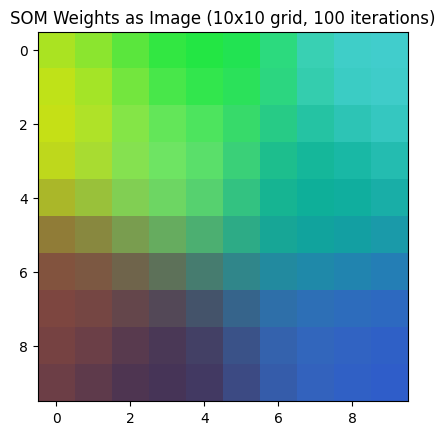

In [32]:
 # Initialise a small SOM configuration with a 10x10 grid and 100 iterations, and a fixed random seed for reproducibility.
cfg_small = SOMConfig(width=10, height=10, n_iterations=100, seed=42, log_every=10)

# Initialise and train the SOM with the generated data.
som_small = SelfOrganisingMap(cfg_small).fit(X)  

# display the image data.
plt.imshow(som_small.weights_as_image())
plt.title("SOM Weights as Image (10x10 grid, 100 iterations)")

# save the image data.
plt.imsave("images/som_10x10_100.png", som_small.weights_as_image())

2026-02-11 20:54:31,155 | INFO | __main__ | Starting SOM training: samples=10, features=3, grid=100x100, iterations=1000
2026-02-11 20:54:31,355 | INFO | __main__ | Iter 50/1000 | sigma=41.2782 | alpha=0.0826 | block=0.195s | avg_iter=0.0039s
2026-02-11 20:54:31,503 | INFO | __main__ | Iter 100/1000 | sigma=33.9447 | alpha=0.0679 | block=0.148s | avg_iter=0.0030s
2026-02-11 20:54:31,650 | INFO | __main__ | Iter 150/1000 | sigma=27.9141 | alpha=0.0558 | block=0.146s | avg_iter=0.0029s
2026-02-11 20:54:31,794 | INFO | __main__ | Iter 200/1000 | sigma=22.9549 | alpha=0.0459 | block=0.144s | avg_iter=0.0029s
2026-02-11 20:54:31,941 | INFO | __main__ | Iter 250/1000 | sigma=18.8767 | alpha=0.0378 | block=0.146s | avg_iter=0.0029s
2026-02-11 20:54:32,095 | INFO | __main__ | Iter 300/1000 | sigma=15.5231 | alpha=0.0310 | block=0.153s | avg_iter=0.0031s
2026-02-11 20:54:32,247 | INFO | __main__ | Iter 350/1000 | sigma=12.7653 | alpha=0.0255 | block=0.152s | avg_iter=0.0030s
2026-02-11 20:54:32

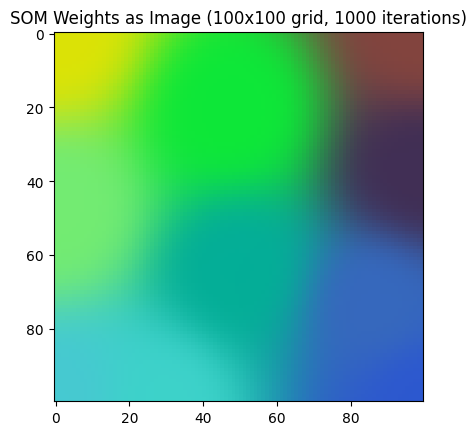

In [33]:
# Now let's create a larger SOM with a 100x100 grid and 1000 iterations, using the same data and random seed for consistency.
cfg_big = SOMConfig(width=100, height=100, n_iterations=1000, seed=42, log_every=50) 

# Initialize and train the larger SOM with the same data.
som_big = SelfOrganisingMap(cfg_big).fit(X)

#display the image data.
plt.imshow(som_big.weights_as_image())
plt.title("SOM Weights as Image (100x100 grid, 1000 iterations)")

# save the image data.
plt.imsave("images/som_100x100_1000.png", som_big.weights_as_image())

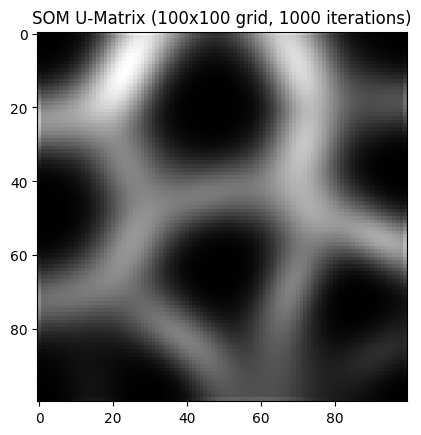

In [34]:
# Compute the U-matrix for the large SOM (greyscale visualisation).
u = som_big.u_matrix()  

# Normalize the U-matrix to [0, 1] for better visualisation.
u_norm = (u - u.min()) / (u.max() - u.min() + 1e-12)

# display the U-matrix.
plt.imshow(u_norm, cmap="gray")
plt.title("SOM U-Matrix (100x100 grid, 1000 iterations)")

# save the U-matrix as a greyscale image.
plt.imsave("images/som_100x100_1000_umatrix.png", u_norm, cmap="gray")

2026-02-11 20:51:42,307 | INFO | __main__ | Loaded SOM with grid 100x100


Text(0.5, 1.0, 'Loaded SOM Weights as Image (should match previous)')

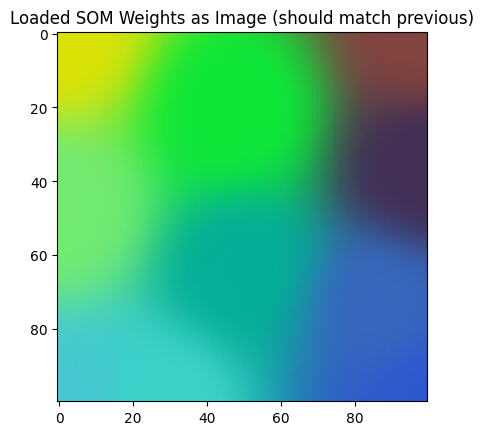

In [31]:
# Save demonstration.
som_big.save("som_big.npz")

# Load demonstration.
som_loaded = SelfOrganisingMap.load("som_big.npz")

# Verify load is correct.
LOGGER.info("Loaded SOM with grid %dx%d", som_loaded.config.width, som_loaded.config.height)

# Visualise loaded SOM weights to confirm they match the original.
plt.imshow(som_loaded.weights_as_image())
plt.title("Loaded SOM Weights as Image (should match previous)")